In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
file_name = "10ft_3k"
real_df = pd.read_csv(f"data/input_reals/{file_name}.csv", ";")
syn_df = pd.read_csv(f"data/output_synt/{file_name}.csv", ";")
real_df

,CROSSING,FINISSHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,DRIBBLING,CURVE,FREE_KICK_ACCURACY,LONG_PASSING,BALL_CONTROL
0,75.0,48.0,56.0,67.0,56.0,67.0,73.0,70.0,69.0,69.0
1,75.0,35.0,58.0,71.0,32.0,48.0,54.0,43.0,61.0,72.0
2,59.0,68.0,72.0,61.0,64.0,63.0,57.0,54.0,57.0,66.0
3,60.0,55.0,81.0,78.0,50.0,57.0,58.0,48.0,77.0,74.0
4,63.0,47.0,51.0,64.0,59.0,66.0,71.0,69.0,60.0,64.0
...,...,...,...,...,...,...,...,...,...,...
2995,53.0,77.0,80.0,71.0,68.0,61.0,58.0,56.0,62.0,57.0
2996,41.0,76.0,69.0,68.0,66.0,68.0,51.0,33.0,59.0,72.0
2997,78.0,71.0,54.0,77.0,68.0,74.0,85.0,83.0,76.0,77.0
2998,32.0,31.0,67.0,52.0,45.0,56.0,67.0,54.0,52.0,59.0


## Correlation Evaluation

In [3]:
real_corr, syn_corr = real_df.corr(), syn_df.corr()
diff_corr = real_corr - syn_corr

dtime = datetime.now().strftime('%Y%m%d_%H%M%S')

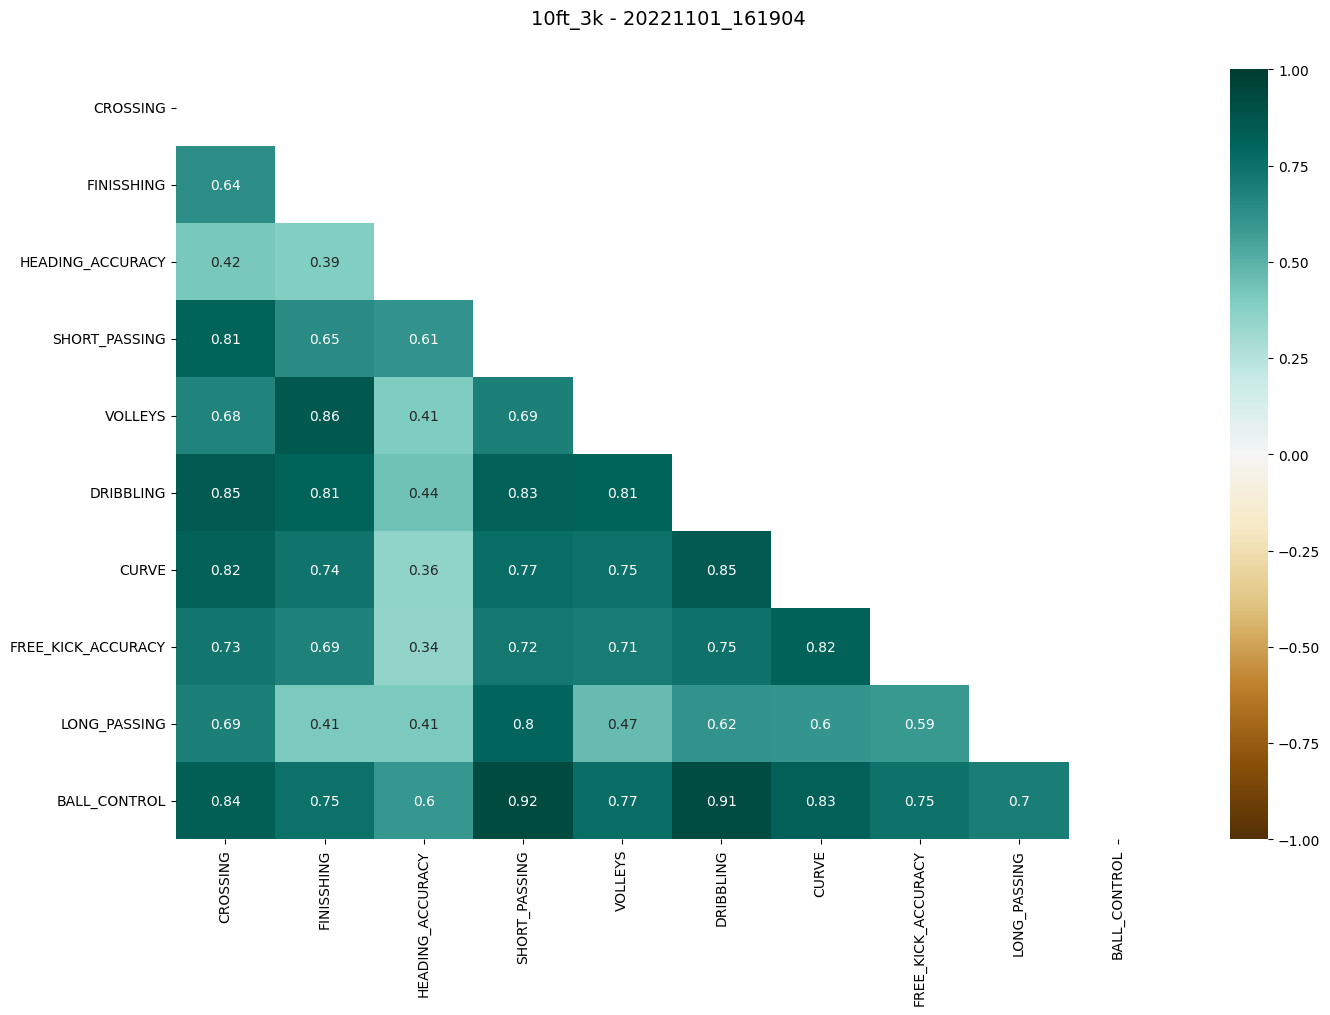

In [4]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(real_corr, dtype=np.bool))
dtime = datetime.now().strftime('%Y%m%d_%H%M%S')

heatmap = sns.heatmap(real_corr,
                      mask=mask,
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG')

title = "Difference of Correlations (expected as close to zero)"
png_name = f"data/output_synt/" +str(file_name) + str(dtime)+ ".png"
heatmap.set_title(f"{file_name} - {dtime} \n", fontdict={"fontsize":14}, pad=16)
plt.savefig(png_name)

## CumSum Evaluation

In [5]:
real_scaler = MinMaxScaler((0, 1))
scaled_real = pd.DataFrame(real_scaler.fit_transform(real_df))
scaled_real.columns = real_df.columns

syn_scaler = MinMaxScaler((0, 1))
scaled_syn = pd.DataFrame(syn_scaler.fit_transform(syn_df))
scaled_syn.columns = syn_df.columns

In [6]:
scaled_real["CROSSING"].sort_values().cumsum()

2370       0.000000
338        0.000000
931        0.024096
1795       0.048193
1874       0.084337
           ...     
1534    1831.493976
469     1832.493976
1653    1833.493976
173     1834.493976
1256    1835.493976
Name: CROSSING, Length: 3000, dtype: float64

In [7]:
def get_cumsum_diff(feature):
    return scaled_syn[feature].sort_values().cumsum().values - scaled_real[feature].sort_values().cumsum().values

In [8]:
def cum_sum_export(scaled_real, scaled_syn, feature):
    cumsum_diff = get_cumsum_diff(feature)
    cumsum_real = scaled_real[feature].sort_values().cumsum().values
    cumsum_syn = scaled_syn[feature].sort_values().cumsum().values

    plt.axhline(0, color="gray", alpha=.35, label="Baseline")
    plt.plot(cumsum_diff, color="gray", label="Cumulative Sum Difference")
    plt.plot(scaled_real[feature].sort_values().cumsum().values, color="red", label="Real Cumulative Sum")
    plt.plot(scaled_syn[feature].sort_values().cumsum().values, color="blue", label="Syn Cumulative Sum")
    plt.title(f"{file_name} - {feature} - {dtime}")
    plt.savefig(f"data/output_synt/{file_name}_{feature}_{dtime}.png")
    plt.legend()
    plt.clf()

In [9]:
scaled_syn

,CROSSING,FINISSHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,DRIBBLING,CURVE,FREE_KICK_ACCURACY,LONG_PASSING,BALL_CONTROL
0,0.881579,0.729412,0.456790,0.845070,0.740741,0.892857,0.792683,0.839506,0.800000,0.894737
1,0.605263,0.447059,0.962963,0.647887,0.592593,0.440476,0.402439,0.530864,0.628571,0.644737
2,0.763158,0.811765,0.814815,0.746479,0.753086,0.797619,0.719512,0.481481,0.628571,0.802632
3,0.842105,0.517647,0.753086,0.690141,0.506173,0.666667,0.585366,0.543210,0.685714,0.697368
4,0.671053,0.870588,0.839506,0.718310,0.901235,0.845238,0.756098,0.604938,0.471429,0.842105
...,...,...,...,...,...,...,...,...,...,...
2995,0.736842,0.541176,0.740741,0.732394,0.469136,0.678571,0.573171,0.617284,0.714286,0.710526
2996,0.539474,0.305882,0.839506,0.577465,0.320988,0.464286,0.353659,0.296296,0.571429,0.592105
2997,0.592105,0.388235,0.802469,0.732394,0.407407,0.595238,0.365854,0.481481,0.714286,0.697368
2998,0.065789,0.117647,0.086420,0.042254,0.086420,0.107143,0.060976,0.123457,0.428571,0.065789


In [10]:
for feature in real_df.columns:
    cum_sum_export(scaled_real, scaled_syn, feature)

<Figure size 640x480 with 0 Axes>